# Dice Roll Simulation and Distribution

This will be the same as the coin flip distribution demonstration, however, this time using a dice instead. Showing how distribution evens out across the 6 outcomes of a dice, reflecting the expected result of 1/6 for each face.

This will be using the same code as the coin flip file, so if you would like a more broken down and explained notebook, please see that one, also on this repository.

And again, please change the n_tosses value to see for yourself how sample size affects the distribution of outcomes.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
n_tosses = 10

tosses = np.random.choice(['1', '2', '3', '4', '5', '6'], size=n_tosses)

#create df to store results
df = pd.DataFrame(tosses, columns=['Result'])
counts = df['Result'].value_counts()
print(counts)

Result
1    4
6    4
2    1
5    1
Name: count, dtype: int64


Text(0.5, 1.0, 'Distribution of Dice Roll Results n=10')

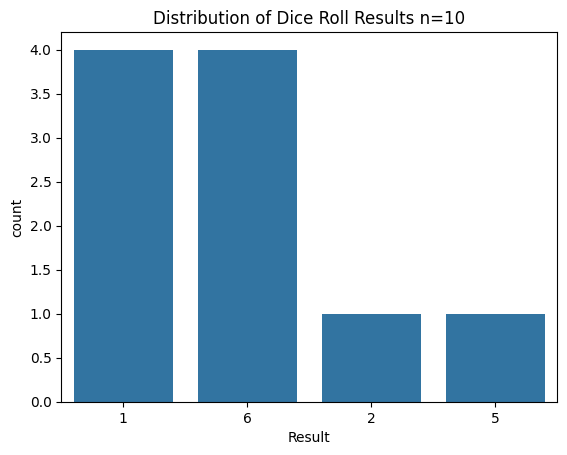

In [4]:
sns.countplot(data=df, x='Result')
plt.title(f'Distribution of Dice Roll Results n={n_tosses}')

In [5]:
# Define the  sample sizes to test
n_values = [10, 100, 1000, 10000, 100000]

# Store results in a list of dicts
results = []

for n in n_values:
    tosses = np.random.choice(['1', '2', '3', '4', '5', '6'], size=n)
    counts = pd.Series(tosses).value_counts(normalize=True) * 100  # Get % directly
    pct_1 = counts.get('1', 0)
    pct_2 = counts.get('2', 0)
    pct_3 = counts.get('3', 0)
    pct_4 = counts.get('4', 0)
    pct_5 = counts.get('5', 0)
    pct_6 = counts.get('6', 0)

    results.append({'n': n, '1%': pct_1, '2%': pct_2, '3%': pct_3, '4%': pct_4, '5%': pct_5, '6%': pct_6})

# Turn the list of dicts into a DataFrame
proportion_df = pd.DataFrame(results)

print(proportion_df)

        n      1%      2%      3%      4%      5%      6%
0      10  30.000  20.000  20.000  10.000  10.000  10.000
1     100  15.000  17.000  18.000  17.000   9.000  24.000
2    1000  16.200  14.900  15.100  18.800  17.200  17.800
3   10000  16.500  16.910  17.030  16.600  16.210  16.750
4  100000  16.718  16.837  16.721  16.495  16.658  16.571


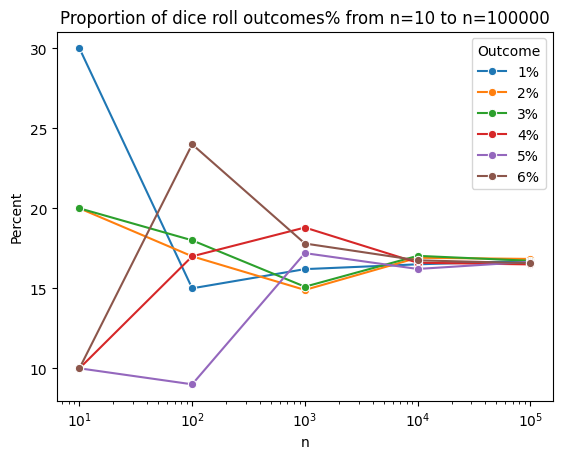

In [6]:
#melt outcomes together into one column, and the value will be the column next to it

proportion_df_melted = proportion_df.melt(
    id_vars='n',                # Keep 'n' as ID
    value_vars=['1%', '2%', '3%', '4%', '5%', '6%'],  # The columns to unpivot
    var_name='Outcome',         # New column name for variable
    value_name='Percent'        # New column for values
)

proportion_df_melted

sns.lineplot(
    data=proportion_df_melted,  # long format DataFrame
    x='n',                      # x-axis: number of tosses
    y='Percent',                # y-axis: proportion
    hue='Outcome',              # separate line for each outcome
    marker='o'                  # add markers for each point
)
plt.title("Proportion of dice roll outcomes% from n=10 to n=100000")
plt.xscale('log') #use log scale for x-axis so plot is easier to read